In [86]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt

In [87]:
trans = pd.read_csv('transactions_n100000.csv')
trans1 = pd.read_csv('transactions_n100000.csv')
trans.head()

,ticket_id,order_timestamp,location,item_name,item_count,lat,long
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234


In [88]:
print(trans['item_name'].value_counts())
print(trans['location'].value_counts())
print(trans['item_count'].value_counts())
print(type(trans['order_timestamp'][0]))

fries     100000
burger     76114
shake      46283
salad      38344
Name: item_name, dtype: int64
2    37343
6    37032
9    34083
4    33890
7    33547
8    22082
3    21257
1    21216
5    20291
Name: location, dtype: int64
1    87297
2    59602
4    47036
3    45396
5    21410
Name: item_count, dtype: int64
<class 'str'>


In [194]:
#filter_downtown = [1,3,5,8]
trans.groupby(['location','item_name']).count()

ticket_id  order_timestamp  item_count    lat   long
location item_name                                                      
1        burger          4042             4042        4042   4042   4042
         fries           8682             8682        8682   8682   8682
         salad           6481             6481        6481   6481   6481
         shake           2011             2011        2011   2011   2011
2        burger         14661            14661       14661  14661  14661
         fries          15771            15771       15771  15771  15771
         salad           1926             1926        1926   1926   1926
         shake           4985             4985        4985   4985   4985
3        burger          4028             4028        4028   4028   4028
         fries           8691             8691        8691   8691   8691
         salad           6487             6487        6487   6487   6487
         shake           2051             2051        2051   2051   2051
4        burger         10347            10347       10347  10347  10347
         fries          11338            11338       11338  11338  11338
         salad           2822             2822        2822   2822   2822
         shake           9383             9383        9383   9383   9383
5        burger          3619             3619        3619   3619   3619
         fries           8307             8307        8307   8307   8307
         salad           6449             6449        6449   6449   6449
         shake           1916             1916        1916   1916   1916
6        burger         14520            14520       14520  14520  14520
         fries          15607            15607       15607  15607  15607
         salad           1938             1938        1938   1938   1938
         shake           4967             4967        4967   4967   4967
7        burger         10222            10222       10222  10222  10222
         fries          11237            11237       11237  11237  11237
         salad           2849             2849        2849   2849   2849
         shake           9239             9239        9239   9239   9239
8        burger          4240             4240        4240   4240   4240
         fries           8962             8962        8962   8962   8962
         salad           6564             6564        6564   6564   6564
         shake           2316             2316        2316   2316   2316
9        burger         10435            10435       10435  10435  10435
         fries          11405            11405       11405  11405  11405
         salad           2828             2828        2828   2828   2828
         shake           9415             9415        9415   9415   9415

In [89]:
multi_level_index_series =trans1.set_index(["ticket_id", "order_timestamp",'location','lat','long','item_name'])["item_count"]

In [90]:
new_trans = multi_level_index_series.unstack()
new_trans = new_trans.rename_axis(columns=None)
new_trans = new_trans.reset_index()
new_trans = new_trans.fillna(0)

In [91]:
print(new_trans.head())
print(new_trans.shape)

  ticket_id      order_timestamp  location        lat       long  burger  \
0  0x100048  2019-03-29 12:24:00         1  41.880844 -87.630524     0.0   
1  0x100057  2019-11-24 00:24:00         6  41.784576 -87.607565     1.0   
2  0x1000ba  2019-02-09 12:02:00         5  41.881818 -87.640234     1.0   
3  0x1000fb  2019-08-31 19:28:00         4  41.889047 -87.803605     4.0   
4  0x10016e  2019-09-13 17:07:00         7  41.794132 -88.010140     3.0   

   fries  salad  shake  
0    3.0    3.0    0.0  
1    1.0    0.0    0.0  
2    2.0    1.0    1.0  
3    5.0    1.0    4.0  
4    3.0    0.0    3.0  
(100000, 9)


In [92]:
new_trans['order_timestamp'] = pd.to_datetime(new_trans['order_timestamp'])
new_trans['hour'] = new_trans['order_timestamp'].dt.hour
new_trans['hour'].value_counts().sort_index()

0     22837
1      5432
11     8084
12    12924
13     8330
14     2208
15      560
16     2115
17     8058
18    12967
19     8287
20     2199
21      370
22      194
23     5435
Name: hour, dtype: int64

closed from 2am - 10am


In [93]:
new_trans['weekday'] = new_trans['order_timestamp'].dt.weekday
new_trans['weekday'].value_counts().sort_index()

0    14278
1    14270
2    14299
3    14186
4    14440
5    14235
6    14292
Name: weekday, dtype: int64

In [94]:
new_trans['month'] = new_trans['order_timestamp'].dt.month
new_trans['month'].value_counts().sort_index()

1     8611
2     7687
3     8559
4     8232
5     8475
6     8200
7     8482
8     8467
9     8166
10    8526
11    8218
12    8377
Name: month, dtype: int64

In [95]:
new_trans['location'].value_counts().sort_index()

1     8682
2    15771
3     8691
4    11338
5     8307
6    15607
7    11237
8     8962
9    11405
Name: location, dtype: int64

In [96]:
# check if location and lat long is the same thing
new_trans[new_trans['location'] == 5]


,ticket_id,order_timestamp,location,lat,long,burger,fries,salad,shake,hour,weekday,month
2,0x1000ba,2019-02-09 12:02:00,5,41.881818,-87.640234,1.0,2.0,1.0,1.0,12,5,2
43,0x100d7a,2019-10-28 11:57:00,5,41.881818,-87.640234,0.0,1.0,1.0,0.0,11,0,10
61,0x101379,2019-03-03 13:48:00,5,41.881818,-87.640234,0.0,1.0,1.0,0.0,13,6,3
66,0x101423,2019-12-01 15:07:00,5,41.881818,-87.640234,0.0,2.0,2.0,0.0,15,6,12
89,0x101d1e,2019-01-24 12:08:00,5,41.881818,-87.640234,1.0,2.0,1.0,1.0,12,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99954,0xfee11,2019-12-06 12:02:00,5,41.881818,-87.640234,3.0,3.0,0.0,1.0,12,4,12
99957,0xfee84,2019-09-12 12:25:00,5,41.881818,-87.640234,1.0,5.0,4.0,0.0,12,3,9
99976,0xff656,2019-06-26 12:14:00,5,41.881818,-87.640234,0.0,1.0,1.0,0.0,12,2,6
99984,0xff917,2019-02-15 12:01:00,5,41.881818,-87.640234,0.0,2.0,2.0,0.0,12,4,2


In [97]:
#lat long and location is the same thing, so drop lat and long, also drop ticket_id and timestamp for clustering
new_trans.drop('lat',
  axis='columns', inplace=True)
new_trans.drop('long',
  axis='columns', inplace=True)
new_trans.drop('ticket_id',
  axis='columns', inplace=True)
new_trans.drop('order_timestamp',
  axis='columns', inplace=True)
new_trans.head()
new_trans.head()


,location,burger,fries,salad,shake,hour,weekday,month
0,1,0.0,3.0,3.0,0.0,12,4,3
1,6,1.0,1.0,0.0,0.0,0,6,11
2,5,1.0,2.0,1.0,1.0,12,5,2
3,4,4.0,5.0,1.0,4.0,19,5,8
4,7,3.0,3.0,0.0,3.0,17,4,9


In [98]:
new_trans[['location','hour','weekday','month']] = new_trans[['location','hour','weekday','month']].astype(str)

In [99]:
type(new_trans['hour'][1])

str

In [100]:
new_trans_dummy1 = new_trans.join(pd.get_dummies(new_trans[['location','hour','weekday','month']]))
new_trans_dummy1.drop('location',
  axis='columns', inplace=True) 

new_trans_dummy1.drop('hour',
  axis='columns', inplace=True) 
new_trans_dummy1.drop('weekday',
  axis='columns', inplace=True) 
new_trans_dummy1.drop('month',
  axis='columns', inplace=True) 



In [101]:
new_trans_dummy2 = new_trans.join(pd.get_dummies(new_trans[['location','hour','weekday']]))
new_trans_dummy2.drop('location',
  axis='columns', inplace=True) 

new_trans_dummy2.drop('hour',
  axis='columns', inplace=True) 
new_trans_dummy2.drop('weekday',
  axis='columns', inplace=True) 
new_trans_dummy2.drop('month',
  axis='columns', inplace=True) 

In [102]:
# enc = OneHotEncoder(handle_unknown='ignore')
# trans_enc = enc.fit(new_trans[['location','hour','weekday','month']])
# enc.categories_

In [103]:
#define function to find the best k number        
def fitting(df):
    Sum_of_squared_distances = []
    K = range(1,10)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
        #inertia_ reports the within group sum of squared errors, which is W in this Jupyter.
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return 

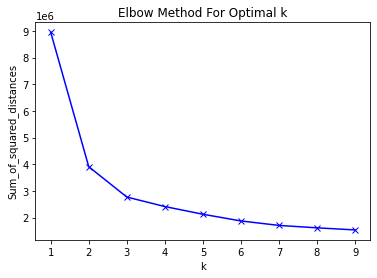

In [104]:
fitting(new_trans)

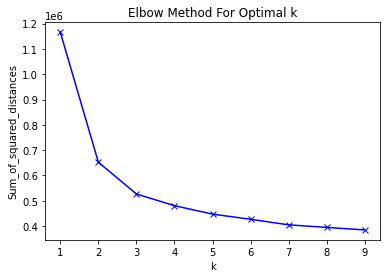

In [105]:
#with month
fitting(new_trans_dummy1)

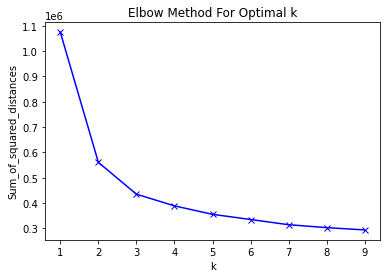

In [106]:
#with out month
fitting(new_trans_dummy2)

In [107]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(new_trans_dummy2)
kmeans.labels_


array([0, 2, 4, ..., 4, 2, 1], dtype=int32)

In [108]:
np.round(kmeans.cluster_centers_)

array([[0., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [3., 3., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [4., 4., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]])

too complcated for interprate

month - delete
weekday to Mon-Thur as week, Fri to Sun as weekend
hour - 11-2 as noon
       2 - 5 as afternoon
       5 - 9 as night 
       9 - 2 as late nihght
location - not important

In [109]:
new_trans['weekday_cat'] = np.select(
    [
        new_trans['weekday'].astype(int).between(0, 3, inclusive=True), 
        new_trans['weekday'].astype(int).between(4, 6, inclusive=True)
    ], 
    [
        'week', 
        'weekend'
    ], 
    default='Unknown'
)

new_trans['hour_cat'] = np.select(
    [
        new_trans['hour'].astype(int).isin([11,12,13]), 
        new_trans['hour'].astype(int).isin([14,15,16]), 
        new_trans['hour'].astype(int).isin([17,18,19,20]), 
        new_trans['hour'].astype(int).isin([21,22,23,0,1]), 
    ], 
    [
        'noon', 
        'afternoon',
        'night',
        'late_night'
    ], 
    default='Unknown'
)

In [110]:
new_trans.head(10)

,location,burger,fries,salad,shake,hour,weekday,month,weekday_cat,hour_cat
0,1,0.0,3.0,3.0,0.0,12,4,3,weekend,noon
1,6,1.0,1.0,0.0,0.0,0,6,11,weekend,late_night
2,5,1.0,2.0,1.0,1.0,12,5,2,weekend,noon
3,4,4.0,5.0,1.0,4.0,19,5,8,weekend,night
4,7,3.0,3.0,0.0,3.0,17,4,9,weekend,night
5,4,2.0,3.0,1.0,2.0,19,4,1,weekend,night
6,9,3.0,3.0,0.0,3.0,20,1,7,week,night
7,7,4.0,4.0,0.0,4.0,19,5,10,weekend,night
8,9,1.0,1.0,0.0,0.0,23,0,7,week,late_night
9,8,1.0,1.0,0.0,0.0,11,2,4,week,noon


In [111]:
new_trans_dummy3 = new_trans.join(pd.get_dummies(new_trans[['weekday_cat','hour_cat']]))
new_trans_dummy3.drop('location',
  axis='columns', inplace=True) 

new_trans_dummy3.drop('hour',
  axis='columns', inplace=True) 
new_trans_dummy3.drop('weekday',
  axis='columns', inplace=True) 
new_trans_dummy3.drop('hour_cat',
  axis='columns', inplace=True) 
new_trans_dummy3.drop('weekday_cat',
  axis='columns', inplace=True) 
new_trans_dummy3.drop('month',
  axis='columns', inplace=True) 

In [112]:
new_trans_dummy3

,burger,fries,salad,shake,weekday_cat_week,weekday_cat_weekend,hour_cat_afternoon,hour_cat_late_night,hour_cat_night,hour_cat_noon
0,0.0,3.0,3.0,0.0,0,1,0,0,0,1
1,1.0,1.0,0.0,0.0,0,1,0,1,0,0
2,1.0,2.0,1.0,1.0,0,1,0,0,0,1
3,4.0,5.0,1.0,4.0,0,1,0,0,1,0
4,3.0,3.0,0.0,3.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
99995,3.0,3.0,0.0,3.0,1,0,0,0,1,0
99996,2.0,2.0,0.0,0.0,1,0,0,1,0,0
99997,0.0,1.0,1.0,0.0,1,0,0,0,0,1
99998,1.0,1.0,0.0,0.0,0,1,0,1,0,0


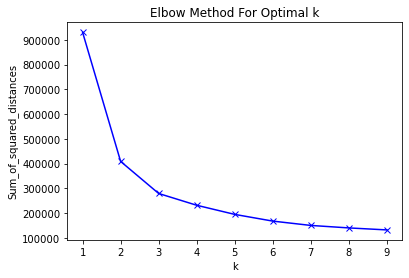

In [113]:
fitting(new_trans_dummy3)

In [114]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(new_trans_dummy3)
kmeans.labels_

array([2, 0, 4, ..., 4, 0, 3], dtype=int32)

In [115]:
np.round(kmeans.cluster_centers_)

array([[1., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [4., 4., 0., 4., 1., 0., 0., 0., 1., 0.],
       [0., 3., 3., 0., 1., 0., 0., 0., 0., 1.],
       [3., 3., 0., 2., 1., 0., 0., 0., 1., 0.],
       [0., 2., 1., 0., 1., 0., 0., 0., 0., 1.]])

In [116]:
#adding location
new_trans['location'] = np.select(
    [
        new_trans['location'].astype(int).isin([1,3,5,8]),
        new_trans['location'].astype(int) == 2,
        new_trans['location'].astype(int) == 4,
        new_trans['location'].astype(int) == 6,
        new_trans['location'].astype(int) == 7,
        new_trans['location'].astype(int) == 9
        
    ], 
    [
        'downtown',
        2,
        4,
        6,
        7,
        9
    ], 
    default='Unknown'
)



In [117]:
new_trans.head(20)

,location,burger,fries,salad,shake,hour,weekday,month,weekday_cat,hour_cat
0,downtown,0.0,3.0,3.0,0.0,12,4,3,weekend,noon
1,6,1.0,1.0,0.0,0.0,0,6,11,weekend,late_night
2,downtown,1.0,2.0,1.0,1.0,12,5,2,weekend,noon
3,4,4.0,5.0,1.0,4.0,19,5,8,weekend,night
4,7,3.0,3.0,0.0,3.0,17,4,9,weekend,night
5,4,2.0,3.0,1.0,2.0,19,4,1,weekend,night
6,9,3.0,3.0,0.0,3.0,20,1,7,week,night
7,7,4.0,4.0,0.0,4.0,19,5,10,weekend,night
8,9,1.0,1.0,0.0,0.0,23,0,7,week,late_night
9,downtown,1.0,1.0,0.0,0.0,11,2,4,week,noon


In [120]:
from kmodes.kprototypes import KPrototypes

In [121]:

new_trans_dummy4 = new_trans.join(pd.get_dummies(new_trans[['location','weekday_cat','hour_cat']]))
new_trans_dummy4.drop('location',
  axis='columns', inplace=True) 

new_trans_dummy4.drop('hour',
  axis='columns', inplace=True) 
new_trans_dummy4.drop('weekday',
  axis='columns', inplace=True) 
new_trans_dummy4.drop('hour_cat',
  axis='columns', inplace=True) 
new_trans_dummy4.drop('weekday_cat',
  axis='columns', inplace=True) 
new_trans_dummy4.drop('month',
  axis='columns', inplace=True) 


In [122]:
new_trans_dummy4

,burger,fries,salad,shake,location_2,location_4,location_6,location_7,location_9,location_downtown,weekday_cat_week,weekday_cat_weekend,hour_cat_afternoon,hour_cat_late_night,hour_cat_night,hour_cat_noon
0,0.0,3.0,3.0,0.0,0,0,0,0,0,1,0,1,0,0,0,1
1,1.0,1.0,0.0,0.0,0,0,1,0,0,0,0,1,0,1,0,0
2,1.0,2.0,1.0,1.0,0,0,0,0,0,1,0,1,0,0,0,1
3,4.0,5.0,1.0,4.0,0,1,0,0,0,0,0,1,0,0,1,0
4,3.0,3.0,0.0,3.0,0,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.0,3.0,0.0,3.0,0,1,0,0,0,0,1,0,0,0,1,0
99996,2.0,2.0,0.0,0.0,0,0,1,0,0,0,1,0,0,1,0,0
99997,0.0,1.0,1.0,0.0,0,0,0,0,0,1,1,0,0,0,0,1
99998,1.0,1.0,0.0,0.0,1,0,0,0,0,0,0,1,0,1,0,0


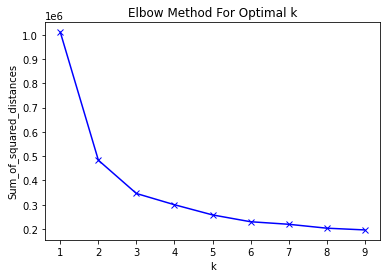

In [123]:
fitting(new_trans_dummy4)

In [129]:
cat_idx=[0,8,9]

In [130]:
kproto = KPrototypes(n_clusters=5, verbose=2, max_iter=20)
kproto.fit(new_trans, categorical=cat_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 22259, ncost: 1951908.904057221
Run: 1, iteration: 2/20, moves: 4990, ncost: 1926280.3130413133
Run: 1, iteration: 3/20, moves: 2398, ncost: 1920779.9308353597
Run: 1, iteration: 4/20, moves: 306, ncost: 1920159.1455328988
Run: 1, iteration: 5/20, moves: 26, ncost: 1920158.5809546968
Run: 1, iteration: 6/20, moves: 0, ncost: 1920158.5809546968
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 32240, ncost: 2044756.7735237018
Run: 2, iteration: 2/20, moves: 13350, ncost: 1985067.8765607711
Run: 2, iteration: 3/20, moves: 3141, ncost: 1977795.7060898773
Run: 2, iteration: 4/20, moves: 3042, ncost: 1958198.5552409543
Run: 2, iteration: 5/20, moves: 5198, ncost: 1911931.0718675232
Run: 2, iteration: 6/20, moves: 3689, ncost: 1896165.1534836749
Run: 2, iteration: 7/20, moves: 1405, ncost: 1894323.881228009
Run: 2, itera

KPrototypes(gamma=2.4639743439517687, max_iter=20, n_clusters=5, verbose=2)

In [150]:
print(kproto.cluster_centroids_[:])

[['3.1744156696451107' '3.3775556565197635' '0.20313998687465293'
  '2.815790802160634' '18.744863445908425' '2.9711242364581754'
  '9.49341208541572' '7' 'week' 'night']
 ['3.171280276816609' '3.368512110726644' '0.1972318339100346'
  '2.8150315489517608' '18.751730103806228' '3.0164359861591694'
  '3.501780989212294' '4' 'week' 'night']
 ['0.34728576728082106' '2.2494126375664645' '1.9021268702856435'
  '0.12235686904909113' '12.23049338444417' '2.981451712625201'
  '9.494373686162978' 'downtown' 'week' 'noon']
 ['1.756871484665181' '1.8137182072234603' '0.05684672255827939'
  '0.3253740846864056' '0.1921539495560508' '3.0002476210690157'
  '6.521808341292582' '2' 'week' 'late_night']
 ['0.33300198807157055' '2.243352385685885' '1.9103503976143141'
  '0.11636431411530815' '12.219184890656063' '3.0406933399602387'
  '3.488568588469185' 'downtown' 'week' 'noon']]


In [ ]:
np.round(kproto.cluster_centroids_)

In [135]:
df = pd.DataFrame(kproto.cluster_centroids_)

In [169]:
new_trans

,location,burger,fries,salad,shake,hour,weekday,month,weekday_cat,hour_cat
0,downtown,0.0,3.0,3.0,0.0,12,4,3,weekend,noon
1,6,1.0,1.0,0.0,0.0,0,6,11,weekend,late_night
2,downtown,1.0,2.0,1.0,1.0,12,5,2,weekend,noon
3,4,4.0,5.0,1.0,4.0,19,5,8,weekend,night
4,7,3.0,3.0,0.0,3.0,17,4,9,weekend,night
...,...,...,...,...,...,...,...,...,...,...
99995,4,3.0,3.0,0.0,3.0,18,0,5,week,night
99996,6,2.0,2.0,0.0,0.0,0,0,12,week,late_night
99997,downtown,0.0,1.0,1.0,0.0,13,3,7,week,noon
99998,2,1.0,1.0,0.0,0.0,0,4,1,weekend,late_night


In [154]:
df

,0,1,2,3,4,5,6,7,8,9
0,3.1744156696451107,3.3775556565197635,0.20313998687465293,2.815790802160634,18.744863445908425,2.9711242364581754,9.49341208541572,7,week,night
1,3.171280276816609,3.368512110726644,0.1972318339100346,2.8150315489517608,18.751730103806228,3.0164359861591694,3.501780989212294,4,week,night
2,0.34728576728082106,2.2494126375664645,1.9021268702856435,0.12235686904909113,12.23049338444417,2.981451712625201,9.494373686162978,downtown,week,noon
3,1.756871484665181,1.8137182072234603,0.05684672255827939,0.3253740846864056,0.1921539495560508,3.0002476210690157,6.521808341292582,2,week,late_night
4,0.33300198807157055,2.243352385685885,1.9103503976143141,0.11636431411530815,12.219184890656063,3.0406933399602387,3.488568588469185,downtown,week,noon


In [166]:
#K-means: new_trans_dummy4

kmeans = KMeans(n_clusters=5, random_state=0).fit(new_trans_dummy4)
kmeans.labels_

array([0, 2, 3, ..., 3, 2, 4], dtype=int32)

In [168]:
new_trans_dummy4

,burger,fries,salad,shake,location_2,location_4,location_6,location_7,location_9,location_downtown,weekday_cat_week,weekday_cat_weekend,hour_cat_afternoon,hour_cat_late_night,hour_cat_night,hour_cat_noon
0,0.0,3.0,3.0,0.0,0,0,0,0,0,1,0,1,0,0,0,1
1,1.0,1.0,0.0,0.0,0,0,1,0,0,0,0,1,0,1,0,0
2,1.0,2.0,1.0,1.0,0,0,0,0,0,1,0,1,0,0,0,1
3,4.0,5.0,1.0,4.0,0,1,0,0,0,0,0,1,0,0,1,0
4,3.0,3.0,0.0,3.0,0,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.0,3.0,0.0,3.0,0,1,0,0,0,0,1,0,0,0,1,0
99996,2.0,2.0,0.0,0.0,0,0,1,0,0,0,1,0,0,1,0,0
99997,0.0,1.0,1.0,0.0,0,0,0,0,0,1,1,0,0,0,0,1
99998,1.0,1.0,0.0,0.0,1,0,0,0,0,0,0,1,0,1,0,0


In [167]:
np.round(kmeans.cluster_centers_)

array([[0., 3., 3., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.],
       [4., 4., 0., 4., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 2., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.],
       [3., 3., 0., 2., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.]])

In [ ]:
#2nd try of kproto

In [170]:
new_trans_kproto = new_trans
new_trans_kproto.drop('hour',
  axis='columns', inplace=True) 

In [171]:
new_trans_kproto

,location,burger,fries,salad,shake,weekday,month,weekday_cat,hour_cat
0,downtown,0.0,3.0,3.0,0.0,4,3,weekend,noon
1,6,1.0,1.0,0.0,0.0,6,11,weekend,late_night
2,downtown,1.0,2.0,1.0,1.0,5,2,weekend,noon
3,4,4.0,5.0,1.0,4.0,5,8,weekend,night
4,7,3.0,3.0,0.0,3.0,4,9,weekend,night
...,...,...,...,...,...,...,...,...,...
99995,4,3.0,3.0,0.0,3.0,0,5,week,night
99996,6,2.0,2.0,0.0,0.0,0,12,week,late_night
99997,downtown,0.0,1.0,1.0,0.0,3,7,week,noon
99998,2,1.0,1.0,0.0,0.0,4,1,weekend,late_night


In [174]:
cat_idx=[0,5,6,7,8]

In [179]:
kproto = KPrototypes(n_clusters=5, verbose=2, max_iter=20)
kproto.fit(new_trans_kproto, categorical=cat_idx)

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 35928, ncost: 368453.3059089365
Run: 1, iteration: 2/20, moves: 2683, ncost: 367844.48085850704
Run: 1, iteration: 3/20, moves: 215, ncost: 367732.2500783054
Run: 1, iteration: 4/20, moves: 74, ncost: 367732.1842555934
Run: 1, iteration: 5/20, moves: 0, ncost: 367732.1842555934
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 42747, ncost: 354356.65528606775
Run: 2, iteration: 2/20, moves: 7381, ncost: 349966.7704396938
Run: 2, iteration: 3/20, moves: 1826, ncost: 349414.9151259502
Run: 2, iteration: 4/20, moves: 768, ncost: 349159.8299187949
Run: 2, iteration: 5/20, moves: 288, ncost: 349152.75565682905
Run: 2, iteration: 6/20, moves: 0, ncost: 349152.75565682905
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: ini

KPrototypes(gamma=0.7924874588035684, max_iter=20, n_clusters=5, verbose=2)

In [180]:
print(kproto.cluster_centroids_)

[['1.4086738438952777' '1.4412772204551016' '0.03260337655982383'
  '0.2883839001712748' '2' '3' '1' 'week' 'late_night']
 ['2.9928706104171576' '3.2734503888757955' '0.28057977845863774'
  '2.1140113127504123' '9' '4' '3' 'week' 'night']
 ['0.43150792405460536' '3.3878863957319942' '2.956378471677389'
  '0.14898791777812648' 'downtown' '6' '10' 'week' 'noon']
 ['0.1390177571588546' '1.5317549192129258' '1.3927371620540714'
  '0.04489948274942676' 'downtown' '0' '3' 'week' 'noon']
 ['4.294907874475655' '4.368873785376732' '0.07396591090107789'
  '4.040779482822705' '4' '2' '1' 'week' 'night']]


In [182]:
df2=pd.DataFrame(kproto.cluster_centroids_)
df2

,0,1,2,3,4,5,6,7,8
0,1.4086738438952777,1.4412772204551016,0.03260337655982383,0.2883839001712748,2,3,1,week,late_night
1,2.9928706104171576,3.2734503888757955,0.28057977845863774,2.1140113127504123,9,4,3,week,night
2,0.43150792405460536,3.3878863957319942,2.956378471677389,0.14898791777812648,downtown,6,10,week,noon
3,0.1390177571588546,1.5317549192129258,1.3927371620540714,0.04489948274942676,downtown,0,3,week,noon
4,4.294907874475655,4.368873785376732,0.07396591090107789,4.040779482822705,4,2,1,week,night


In [ ]:
#location:
#downtown:1,3,5,8
#中间的橙色点：2，6（downtown南北各一个）
#最多订单的三个红点：4，7，9

#2，4，9，downtown
#4和9的区别：
#downtown两个的区别：